## Setup environment for google colab & Download data

In [ ]:
%tensorflow_version 2.x
!python colab_setup.py
import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
os.environ['PYTHONPATH'] += ":/content/models"
!python3 -c 'import tensorflow as tf; print(tf.__version__)'
%cd Object_detection_in_urban_environments/

     |████████████████████████████████| 1.5MB 2.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Archive:  Object_detection_in_urban_environments.zip
  inflating: Object_detection_in_urban_environments/.DS_Store  
   creating: Object_detection_in_urban_environments/.git/
  inflating: Object_detection_in_urban_environments/.git/COMMIT_EDITMSG  
  inflating: Object_detection_in_urban_environments/.git/config  
  inflating: Object_detection_in_urban_environments/.git/description  
 extracting: Object_detection_in_urban_environments/.git/HEAD  
   creating: Object_detection_in_urban_environments/.git/hooks/
  inflating: Object_detection_in_urban_environments/.git/hooks/applypatch-msg.sample  
  inflating: Object_detection_in_urban_environments/.git/hooks/commit-msg.sample  
  inflating: Object_detection_in_urban_environments/.git/hooks/post-update.sample  
  inflating: Object_detection_in_urban_environments/.git/hooks/p

In [ ]:
!python download_process.py --data_dir ../data/ --temp_dir .

Streaming output truncated to the last 5000 lines.
(pid=6620) 2020-11-08 02:43:40,428 INFO     Downloading gs://waymo_open_dataset_v_1_2_0_individual_files/training/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord
(pid=6620) 2020-11-08 02:43:40,428 INFO     Downloading gs://waymo_open_dataset_v_1_2_0_individual_files/training/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord
(pid=6620) 2020-11-08 02:43:40,428 INFO     Downloading gs://waymo_open_dataset_v_1_2_0_individual_files/training/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord
(pid=6620) 2020-11-08 02:43:40,428 INFO     Downloading gs://waymo_open_dataset_v_1_2_0_individual_files/training/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord
(pid=6620) 2020-11-08 02:43:40,428 INFO     Downloading gs://waymo_open_dataset_v_1_2_0_individual_files/training/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord
(pid

# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [2]:
import os
from utils import get_dataset
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
%matplotlib inline

In [4]:
dataset = get_dataset("../data/processed/*")

INFO:tensorflow:Reading unweighted datasets: ['../data/processed/*']
INFO:tensorflow:Reading record datasets for input file: ['../data/processed/*']
INFO:tensorflow:Number of filenames to read: 100


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [5]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    # set boxes
    file_name = batch['filename'].numpy().decode('utf-8')
    image = batch['image'].numpy()
    classes = batch['groundtruth_classes'].numpy()
    boxes = batch['groundtruth_boxes'].numpy()
    # Set colors
    pink = '#EB70AA'
    cyan = '#00ffff'
    gold = '#FFD700'
    colors_dict = {1 : pink, 2 : cyan, 4 : gold}
    # plot image + boxes
    _, ax = plt.subplots(1, figsize=(10,12))
    ax.imshow(image.astype(np.uint8))
    ax.set_title(file_name)
    for box, class_i in zip(boxes, classes):
        y1 = box[0]
        x1 = box[1]
        y2 = box[2]
        x2 = box[3]
        width = x2 - x1 
        height = y2 -y1
        box_img = Rectangle((x1, y1), width, height, linewidth=2, 
                        facecolor='none', edgecolor=colors_dict[class_i])
        ax.add_patch(box_img)
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

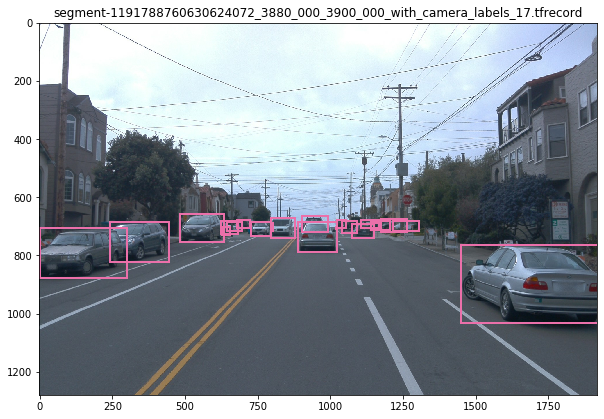

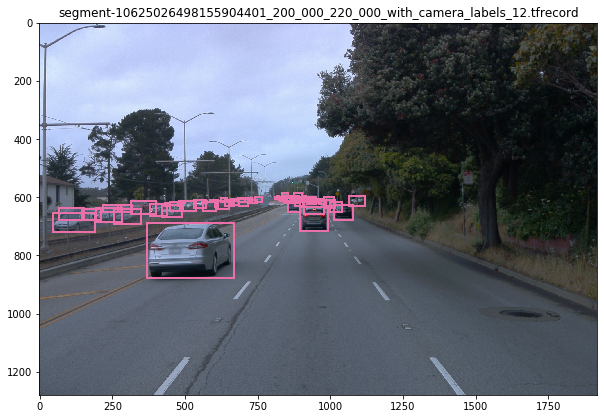

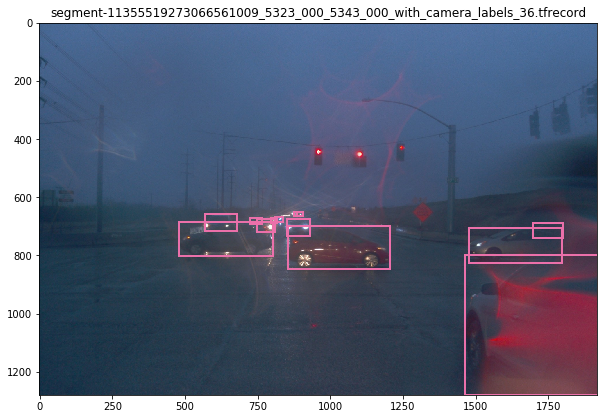

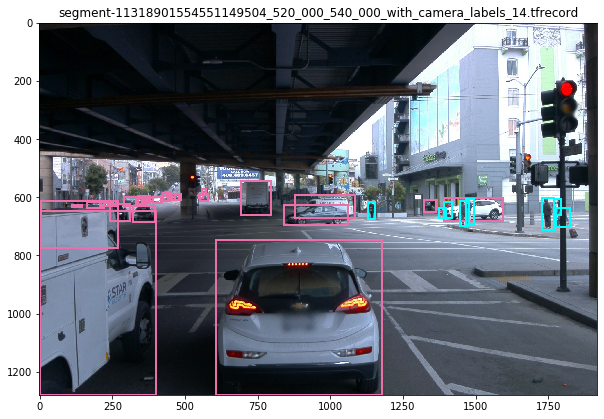

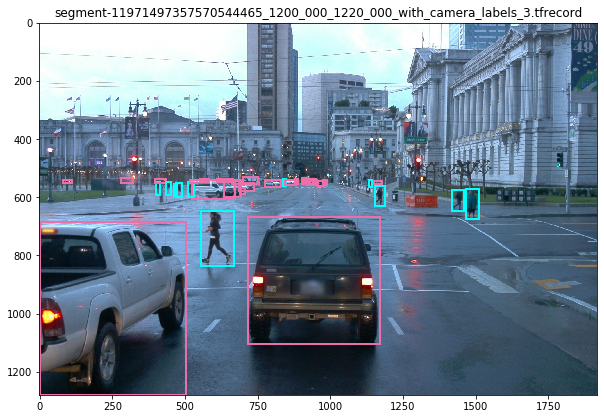

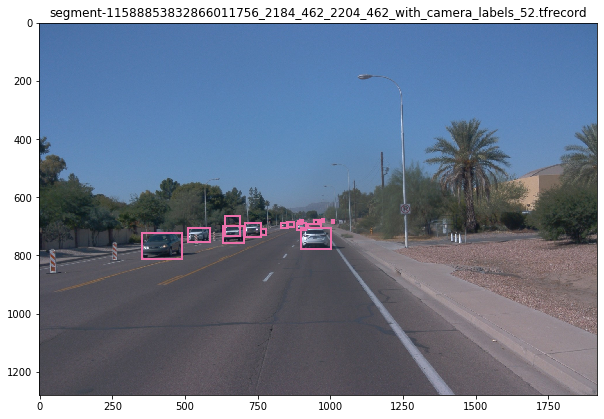

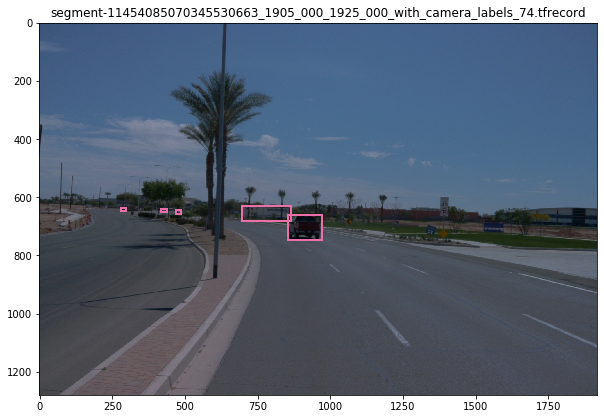

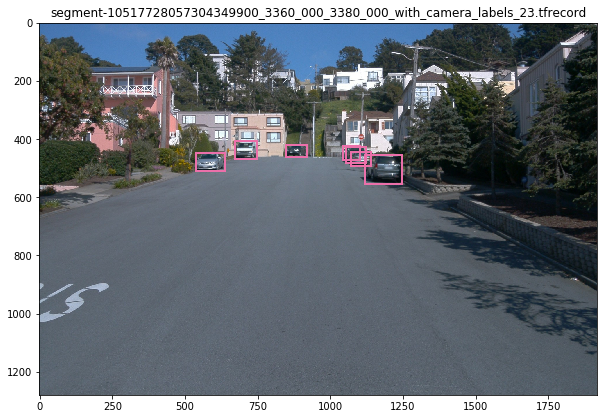

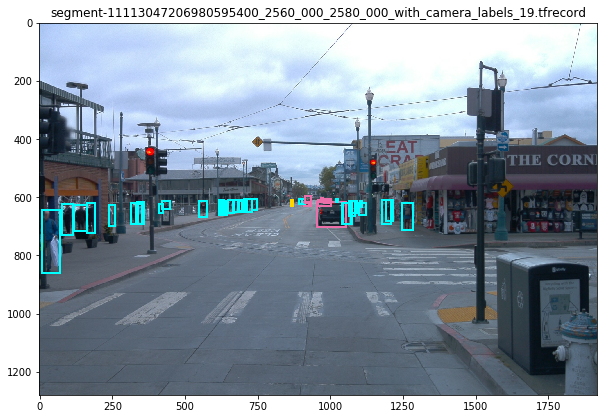

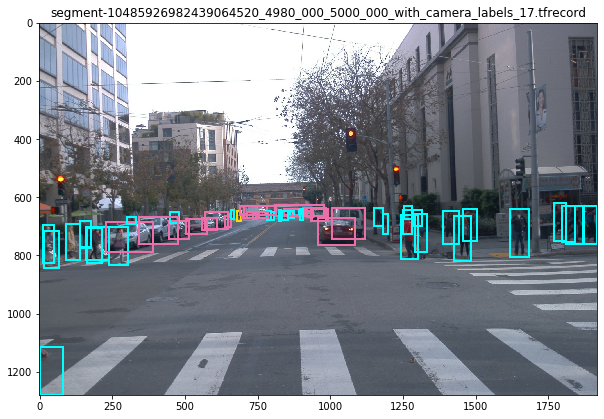

In [ ]:
## STUDENT SOLUTION HERE

dataset.shuffle(100)
for batch in dataset.take(10):
    display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
def count_dataset(path):
    
    filenames = os.listdir(path)
    num_files = sum(os.path.isfile(os.path.join(path, f)) for f in os.listdir(path))
    counter = 0
    for i,file in enumerate(filenames):
        ds = tf.data.TFRecordDataset(path + file)
        for j, _ in ds.enumerate():
            continue
        counter += j.numpy()
        print(f'\rcomputing files... {i+1}/{num_files}',end='',flush=True)
    print('\nDataset count: ' + str(counter))#,end='\r')
    return counter

In [ ]:
processed_dataset = count_dataset('../data/processed/')

computing files... 100/100
Dataset count: 19703


19703

In [16]:
# labels classes {'vehicle': 1, 'pedestrian': 2, 'cyclist': 4}
counter_dict = {1:0,2:0,4:0}
for i, sample in dataset.enumerate():
    i = i.numpy()
    print(f'\rcomputing counts... {i+1}/19703',end='',flush=True)
    if i>19703:
        break
    unique, counts = np.unique(sample['groundtruth_classes'].numpy(),return_counts=True)
    for u, c in zip(unique, counts):
        counter_dict[u] += c
print(f'\nvehicles: {counter_dict[1]}, pedestrians: {counter_dict[2]}, cyclists: {counter_dict[4]}')

computing counts... 19705/19703
vehicles: 341801, pedestrians: 114538, cyclists: 2925


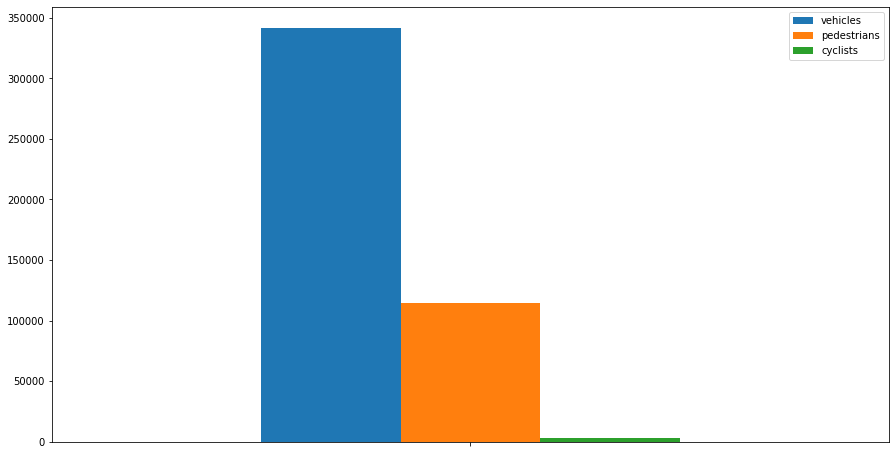

In [17]:
import pandas as pd
df = pd.DataFrame.from_dict({'vehicles':[counter_dict[1]], 'pedestrians': [counter_dict[2]], 'cyclists': [counter_dict[4]]})
_, ax = plt.subplots(1, figsize=(15,8))
df.plot(kind='bar',ax=ax)
ax.set_xticklabels('');